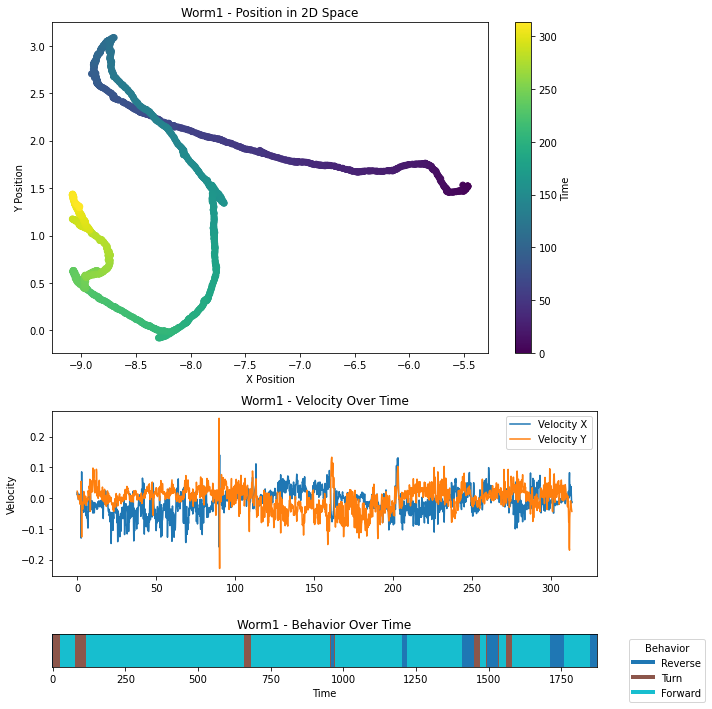

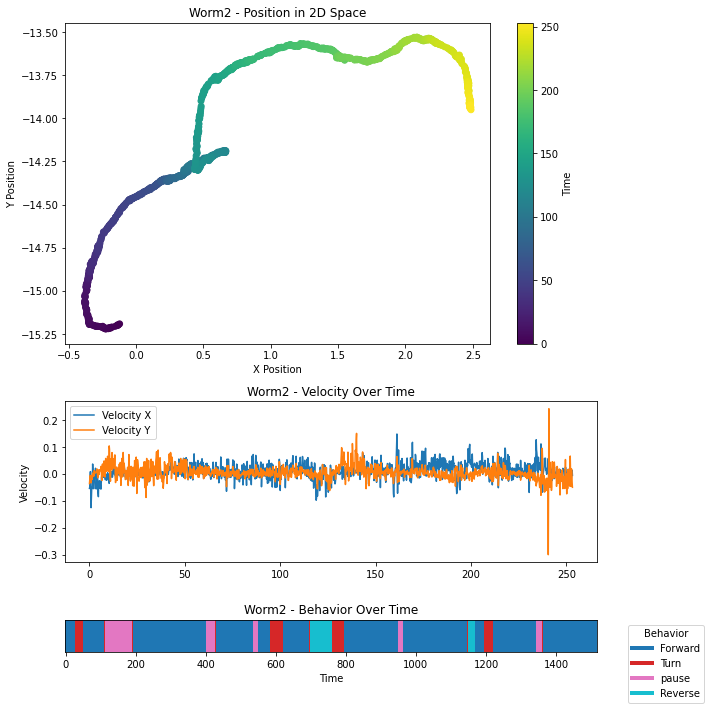

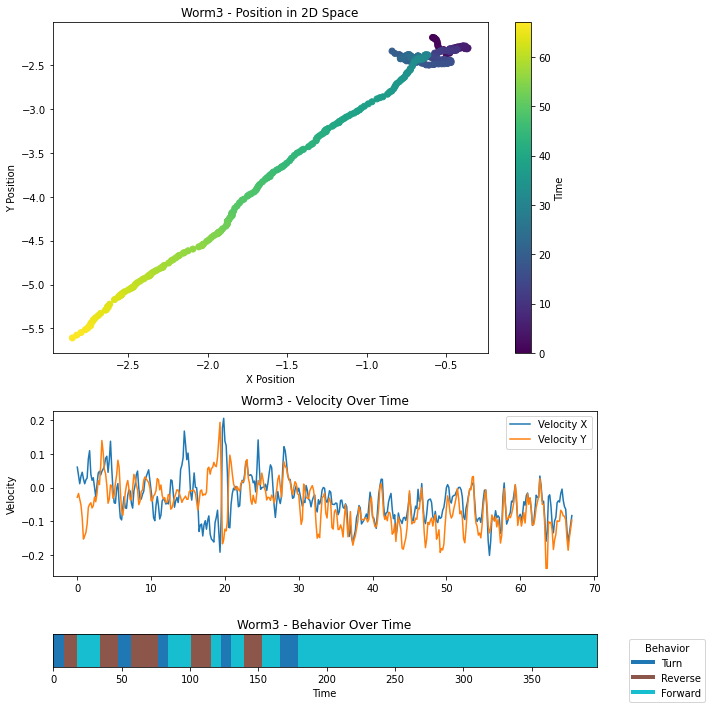

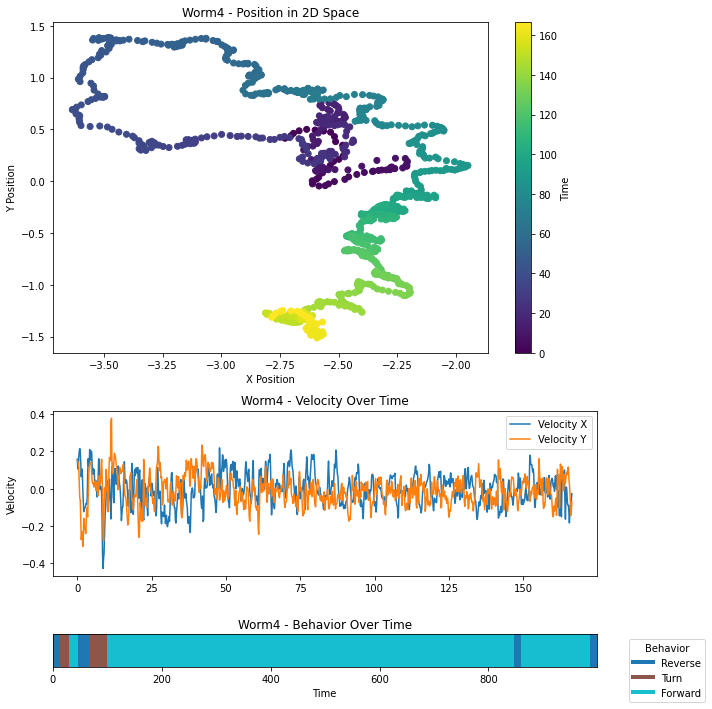

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file
file_path = 'D:/computational neuroscince/NeuroAI/project/data/pnas.1507110112.sd01.xls'
sheets = ['Worm1', 'Worm2', 'Worm3', 'Worm4'] 

data = {sheet: pd.read_excel(file_path, sheet_name=sheet) for sheet in sheets}

# Behavior mapping
behavior_mapping = {1: 'Forward', 2: 'Turn', -1: 'Reverse', 0: 'pause'}

# Function to plot data for each worm
def plot_worm_data(df, worm_name):
    time = df['Time(s)']
    x = df['x(mm)']
    y = df['y(mm)']
    behavior = df['behavior']

   # Calculate velocity
    vel_x = np.gradient(x, time)
    vel_y = np.gradient(y, time)

    # Create the plot with gridspec_kw to adjust height ratios
    fig, axs = plt.subplots(3, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [1, 0.5, 0.1]})
    
    # Plot position in 2D space with color changing over time
    sc = axs[0].scatter(x, y, c=time, cmap='viridis')
    axs[0].set_title(f'{worm_name} - Position in 2D Space')
    axs[0].set_xlabel('X Position')
    axs[0].set_ylabel('Y Position')
    cbar = fig.colorbar(sc, ax=axs[0], orientation='vertical')
    cbar.set_label('Time')

    # Plot velocity of x and y over time
    axs[1].plot(time, vel_x, label='Velocity X')
    axs[1].plot(time, vel_y, label='Velocity Y')
    axs[1].set_title(f'{worm_name} - Velocity Over Time')
    axs[1].set_ylabel('Velocity')
    axs[1].legend()

    # Plot behavior over time as a color bar
    unique_behaviors = behavior.unique()
    behavior_colors = {behavior: i for i, behavior in enumerate(unique_behaviors)}
    behavior_colormap = plt.cm.get_cmap('tab10', len(unique_behaviors))

    behavior_idx = behavior.map(behavior_colors)
    axs[2].imshow([behavior_idx], aspect='auto', cmap=behavior_colormap)
    axs[2].set_yticks([])
    axs[2].set_title(f'{worm_name} - Behavior Over Time')
    axs[2].set_xlabel('Time')

    # Create a legend for behavior using the mapping
    handles = [plt.Line2D([0], [0], color=behavior_colormap(i), lw=4) for i in range(len(unique_behaviors))]
    labels = [behavior_mapping.get(b, b) for b in unique_behaviors]  # Map the numeric values to descriptions
    axs[2].legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left', title='Behavior')

    plt.tight_layout()
    plt.show()

# Plot data for each worm
for sheet in sheets:
    plot_worm_data(data[sheet], sheet)

In [2]:
# Read each sheet into a DataFrame
data = {sheet: pd.read_excel(file_path, sheet_name=sheet) for sheet in sheets}

# Print the column names for each sheet to understand the actual names
for sheet, df in data.items():
    print(f"Columns in {sheet}: {df.columns.tolist()}")

Columns in Worm1: ['Time(s)', 'x(mm)', 'y(mm)', 'behavior', 'Neuron 1', 'Neuron 2', 'Neuron 3', 'Neuron 4', 'Neuron 5', 'Neuron 6', 'Neuron 7', 'Neuron 8', 'Neuron 9', 'Neuron 10', 'Neuron 11', 'Neuron 12', 'Neuron 13', 'Neuron 14', 'Neuron 15', 'Neuron 16', 'Neuron 17', 'Neuron 18', 'Neuron 19', 'Neuron 20', 'Neuron 21', 'Neuron 22', 'Neuron 23', 'Neuron 24', 'Neuron 25', 'Neuron 26', 'Neuron 27', 'Neuron 28', 'Neuron 29', 'Neuron 30', 'Neuron 31', 'Neuron 32', 'Neuron 33', 'Neuron 34', 'Neuron 35', 'Neuron 36', 'Neuron 37', 'Neuron 38', 'Neuron 39', 'Neuron 40', 'Neuron 41', 'Neuron 42', 'Neuron 43', 'Neuron 44', 'Neuron 45', 'Neuron 46', 'Neuron 47', 'Neuron 48', 'Neuron 49', 'Neuron 50', 'Neuron 51', 'Neuron 52', 'Neuron 53', 'Neuron 54', 'Neuron 55', 'Neuron 56']
Columns in Worm2: ['Time(s)', 'x(mm)', 'y(mm)', 'behavior', 'Neuron 1', 'Neuron 2', 'Neuron 3', 'Neuron 4', 'Neuron 5', 'Neuron 6', 'Neuron 7', 'Neuron 8', 'Neuron 9', 'Neuron 10', 'Neuron 11', 'Neuron 12', 'Neuron 13', '